In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot  as plt
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import seaborn as sns


In [49]:
data = pd.read_csv("C:/Users\plaoz\Desktop/veri bilim\datasets/bank-additional.csv", delimiter= ";", quotechar= '"')

In [50]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [51]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [52]:
data.shape

(4119, 21)

In [53]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

ValueError: could not convert string to float: 'blue-collar'

# Preprocessing Part

In [43]:
df_encoded = pd.get_dummies(data, drop_first = True)

scaler = StandardScaler()
numerical_col = data.select_dtypes(include=["int64","float64"]).columns
df_encoded[numerical_col] = scaler.fit_transform(df_encoded[numerical_col])

In [44]:
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,...,False,False,False,False,False,False,False,True,False,False
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,...,False,False,False,False,False,False,False,True,False,False
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,...,False,False,False,False,False,False,True,True,False,False
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,...,False,False,False,False,False,False,False,True,False,False
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,...,True,False,False,True,False,False,False,True,False,False


In [46]:
df_encoded.shape

(4119, 54)

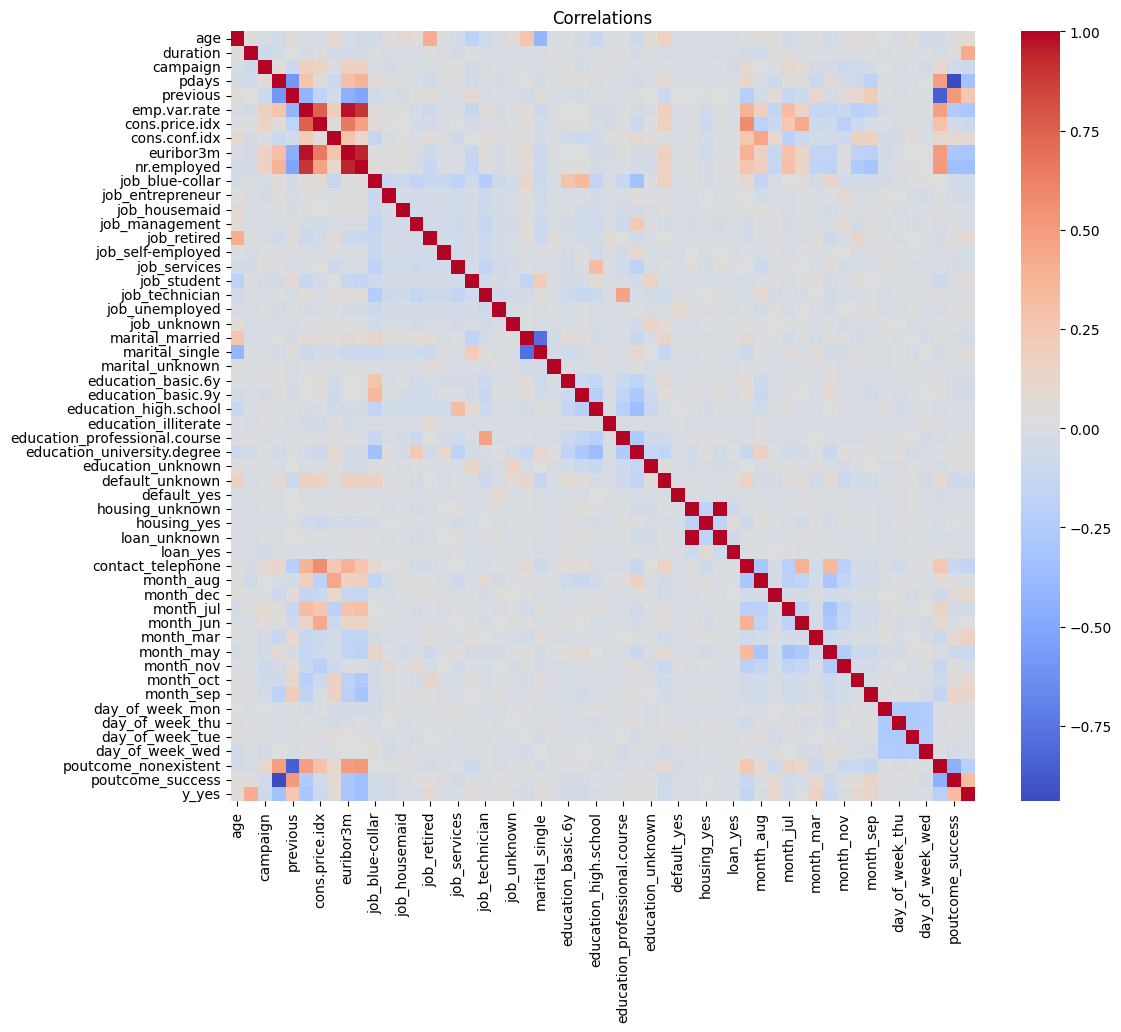

In [59]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize= (12,10))
sns.heatmap(correlation_matrix, annot = False, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlations")
plt.show()

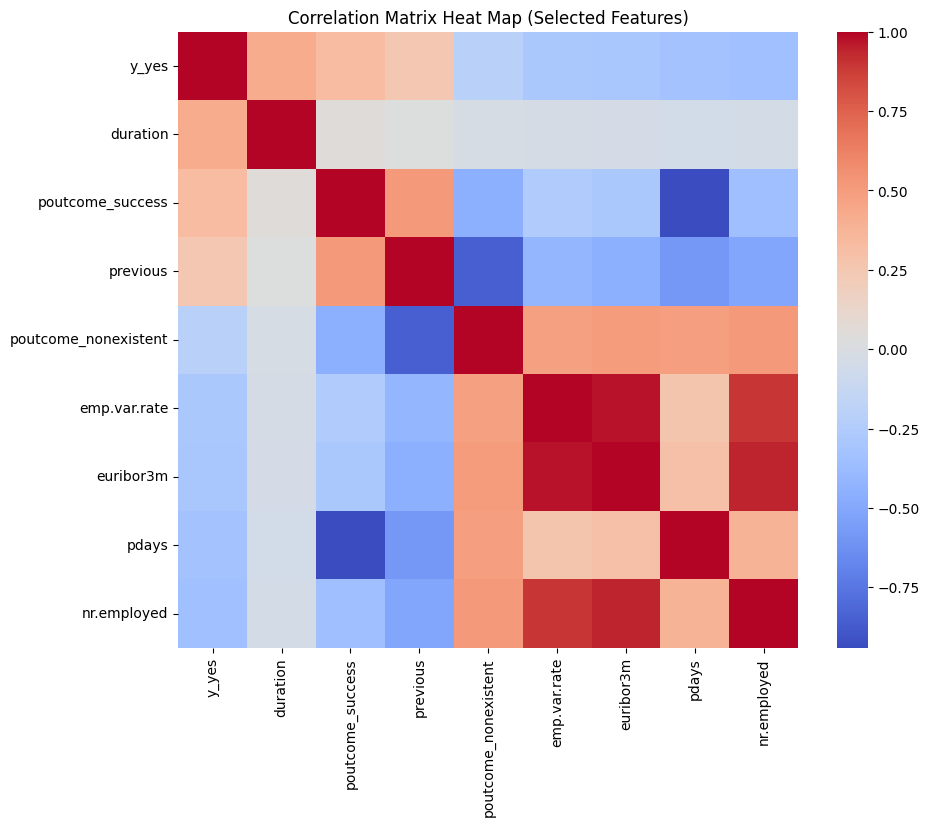

In [61]:
cor_mat = df_encoded.corr()
cor_with_target = cor_mat["y_yes"].sort_values(ascending=False)

threshold = 0.2

selected_features = cor_with_target[abs(cor_with_target) > threshold].index

selected_corr_matrix = df_encoded[selected_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(selected_corr_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heat Map (Selected Features)')
plt.show()

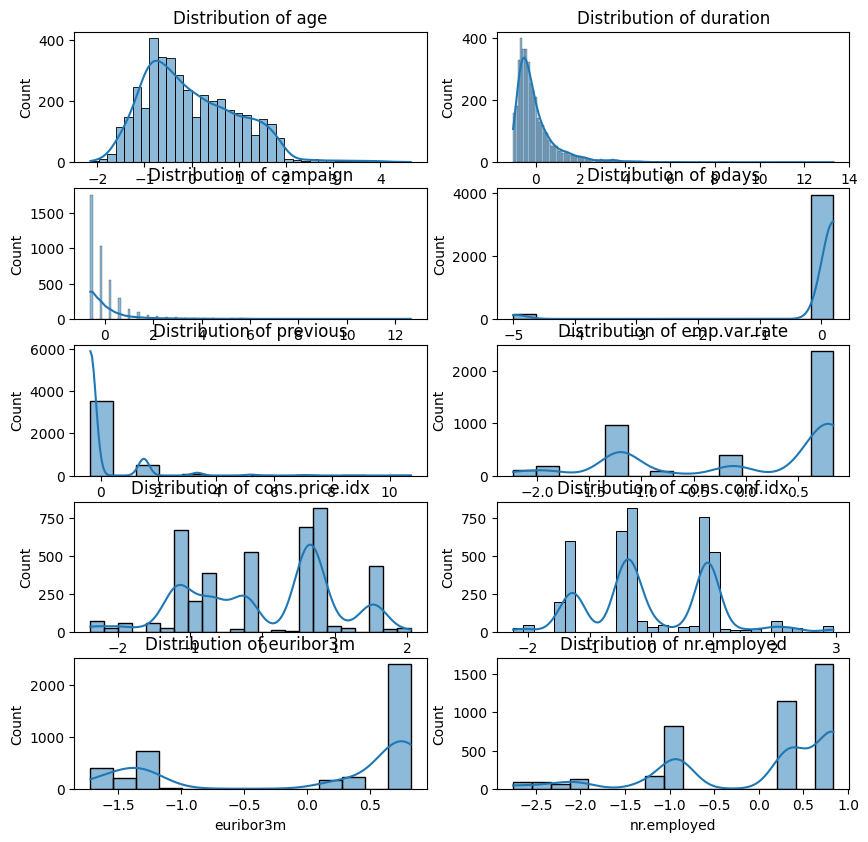

In [78]:
fig,ax = plt.subplots(len(numerical_col), 2, figsize = (10,20))
axes = ax.flatten()  # Flatten the axes array for easy iteration

# Plot histograms with KDE
for ax, col in zip(axes, numerical_col):
    sns.histplot(df_encoded[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

for ax in axes[len(numerical_col):]:
    fig.delaxes(ax)